In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file ='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [4]:
model= cv2.dnn_DetectionModel(frozen_model, config_file)

In [5]:
classLabels =[]
file_name = 'Labels.txt'
with open (file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize (320, 320)
model.setInputScale (1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB (True)

< cv2.dnn.Model 000001764E7E7610>

In [9]:

img1 = cv2.imread('me.jpg')

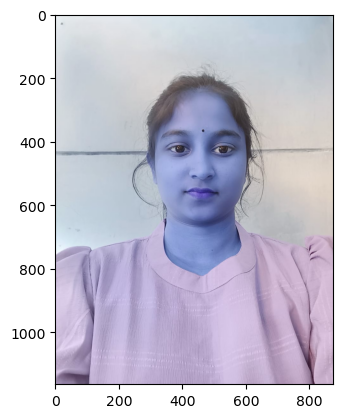

In [10]:
plt.imshow(img1)

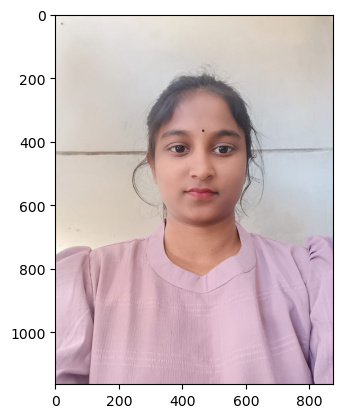

In [11]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex, confidence, bbox =model.detect (img1, confThreshold=0.5)

In [13]:
print(ClassIndex)

[1]


In [14]:
font_scale = 5
font=cv2. FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip (ClassIndex. flatten(), confidence.flatten(), bbox):
	cv2.rectangle (img1, boxes, (255, 0, 0), 2)
	cv2.putText (img1,classLabels[ClassInd-1],(boxes[0] +10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3)

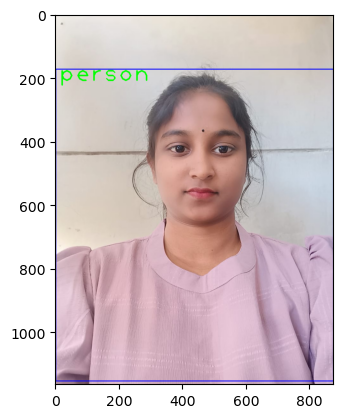

In [15]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

In [16]:

img = cv2.imread('car.jpg')

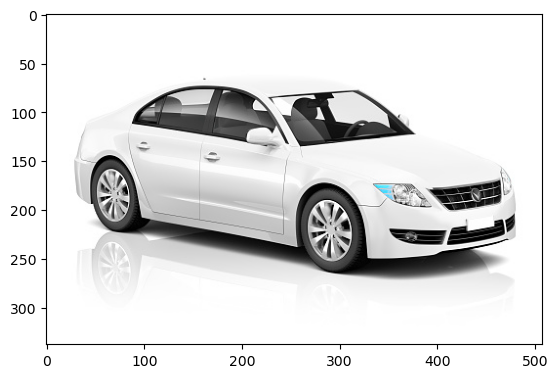

In [17]:
plt.imshow(img)

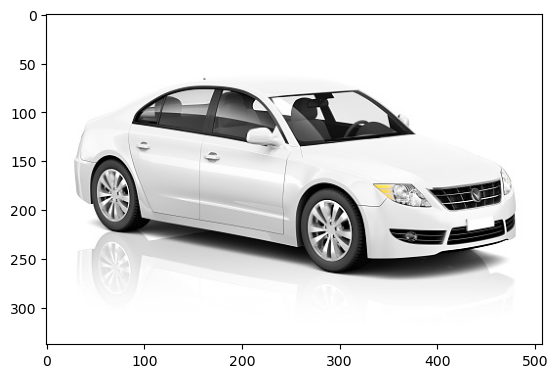

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [19]:
ClassIndex, confidence, bbox =model.detect (img, confThreshold=0.5)

In [20]:
print(ClassIndex)

[3]


In [21]:
font_scale = 3
font=cv2. FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip (ClassIndex. flatten(), confidence.flatten(), bbox):
	cv2.rectangle (img, boxes, (255, 0, 0), 2)
	cv2.putText (img,classLabels[ClassInd-1],(boxes[0] +10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3)

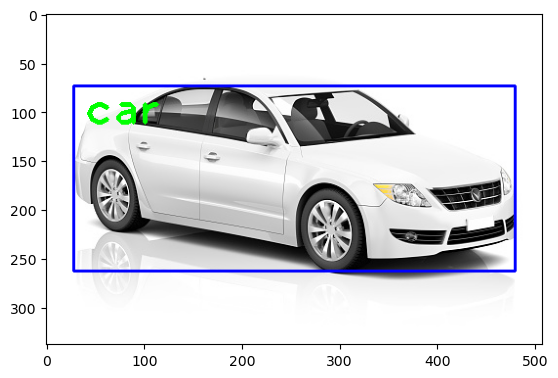

In [22]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [23]:

image2 = cv2.imread('image2.jpg')

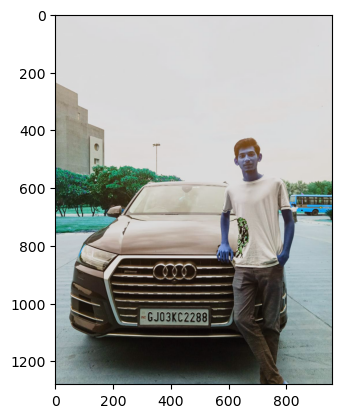

In [24]:
plt.imshow(image2)

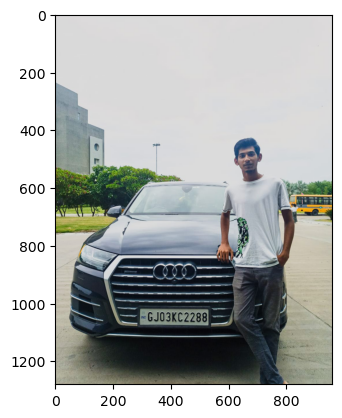

In [25]:
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

In [26]:
ClassIndex, confidence, bbox =model.detect (image2, confThreshold=0.5)

In [27]:
print(ClassIndex)

[1 3 3 3]


In [28]:
font_scale = 3
font=cv2. FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip (ClassIndex. flatten(), confidence.flatten(), bbox):
	cv2.rectangle (image2, boxes, (255, 0, 0), 2)
	cv2.putText (image2,classLabels[ClassInd-1],(boxes[0] +10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3)

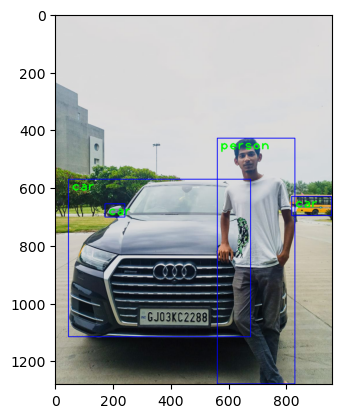

In [29]:
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

In [32]:
import cv2

cap = cv2.VideoCapture("objectVideo2.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    if not ret:
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
        
    cv2.imshow('Object Detection', frame)
    

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [34]:
import cv2

cap = cv2.VideoCapture("objectVideo.mp4")
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    if not ret:
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
        
    cv2.imshow('Object Detection', frame)
    

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [33]:
import cv2
import numpy as np
import time

config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

model = cv2.dnn_DetectionModel(frozen_model, config_file)

classLabels = []
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

cap = cv2.VideoCapture(0)  
if not cap.isOpened():
    raise IOError("Cannot open camera")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

frame_rate = 10
frame_delay = 1 / frame_rate

while True:
    start_time = time.time()
    ret, frame = cap.read()

    if not ret:
        break

    input_size = (300, 300)
    blob = cv2.dnn.blobFromImage(frame, scalefactor=1.0/127.5, size=input_size, mean=(127.5, 127.5, 127.5), swapRB=True, crop=False)
    model.setInputParams(size=input_size, scale=1.0/127.5, swapRB=True, mean=(127.5, 127.5, 127.5))
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                x, y, w, h = boxes
                x += int(w * 0.1) 
                y += int(h * 0.1)  
                w -= int(w * 0.2)  
                h -= int(h * 0.2)  
                
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (x + 10, y + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
        
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    elapsed_time = time.time() - start_time
    if elapsed_time < frame_delay:
        time.sleep(frame_delay - elapsed_time)

cap.release()
cv2.destroyAllWindows()
